In [ ]:
#PARTE 1 - MLP CON DATOS TABULARES

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerie por preprocessing e metric
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

import kagglehub

In [ ]:
# Download latest version
path = kagglehub.dataset_download("ketangangal/heart-disease-dataset-uci")

print("Path to dataset files:", path)

import os

print(path)
print(os.listdir(path))


Using Colab cache for faster access to the 'heart-disease-dataset-uci' dataset.
Path to dataset files: /kaggle/input/heart-disease-dataset-uci
/kaggle/input/heart-disease-dataset-uci
['HeartDiseaseTrain-Test.csv']


In [ ]:
# Carichiamo il dataset tabulare (heart.csv di Kaggle)
df = pd.read_csv(os.path.join(path, "HeartDiseaseTrain-Test.csv"))

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [ ]:
# X = todas las columnas, sin target
X = df.drop("target", axis=1)

# y = columna target (0/1)
y = df["target"]
X.shape, y.shape

((1025, 13), (1025,))

In [ ]:
#tenemos que convertir los features categorial en 0/1
df.dtypes

y = df["target"]
X = df.drop("target", axis=1)

cat_cols = X.select_dtypes(include=["object"]).columns
print("Colonne categoriche:", cat_cols)

# one-hot encoding
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X_encoded.head()


Colonne categoriche: Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
       'thalassemia'],
      dtype='object')


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,fasting_blood_sugar_Lower than 120 mg/ml,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,125,212,168,1.0,True,False,False,True,True,...,False,False,False,False,False,True,False,False,False,True
1,53,140,203,155,3.1,True,False,False,True,False,...,True,False,True,False,False,False,True,False,False,True
2,70,145,174,125,2.6,True,False,False,True,True,...,True,False,True,False,False,False,True,False,False,True
3,61,148,203,161,0.0,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
4,62,138,294,106,1.9,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
#dividimos entre traiset y testset

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
#Scaling/standardizaciòn de las features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((820, 22), (205, 22))

In [ ]:
#No necesitamos de flatten en el MLP
input_dim = X_train_scaled.shape[1]

model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),      # Strato di ingresso: vettore di dimensione = numero di feature
    keras.layers.Dense(32, activation='relu'),   # Prima capa oculta
    keras.layers.Dense(16, activation='relu'),   # Seconda capa oculta
    keras.layers.Dense(1, activation='sigmoid')  # Strato di uscita: 1 neurone, probabilità (0-1)
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',     # perché è classificazione binaria
    metrics=['accuracy']            # poi ne calcolo altre con sklearn
)

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test_scaled, y_test)  #validation sobre el test
)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4945 - loss: 0.7134 - val_accuracy: 0.6683 - val_loss: 0.6124
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7450 - loss: 0.5601 - val_accuracy: 0.7902 - val_loss: 0.5087
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8052 - loss: 0.4571 - val_accuracy: 0.8293 - val_loss: 0.4328
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8492 - loss: 0.3958 - val_accuracy: 0.8244 - val_loss: 0.3815
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8663 - loss: 0.3388 - val_accuracy: 0.8341 - val_loss: 0.3476
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8642 - loss: 0.3240 - val_accuracy: 0.8585 - val_loss: 0.3300
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8765 - loss: 0.2846 - val_accuracy: 0.8537 - val_loss: 0.3164
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8844 - loss: 0.2861 - val_accuracy: 0.8488 - v

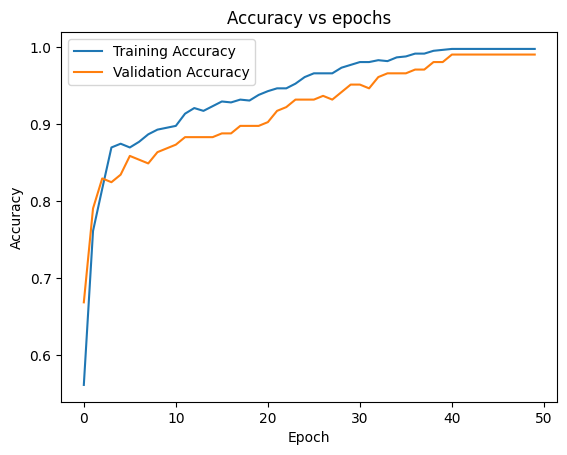

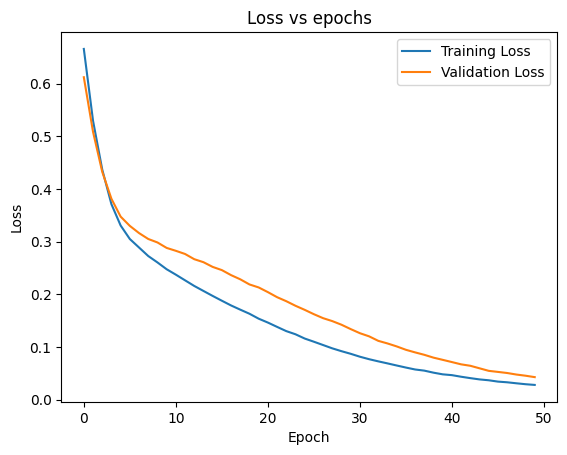

In [ ]:
#Accuracy y Loss
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.title("Loss vs epochs")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [ ]:
# Probabilità previste (valori tra 0 e 1)
y_pred_prob = model.predict(X_test_scaled)

y_pred = (y_pred_prob > 0.5).astype("int32").flatten()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


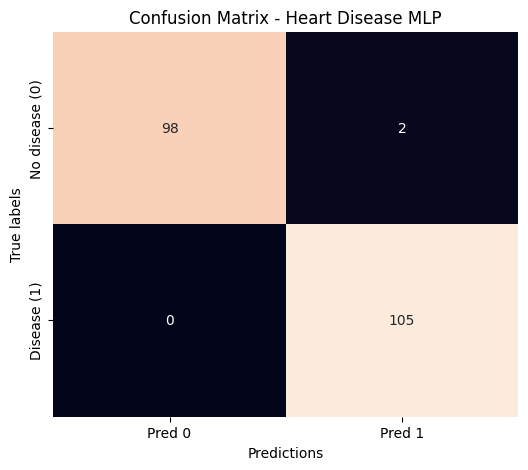

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
#Matrix de confusion y report
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=["No disease (0)", "Disease (1)"],
                         columns=["Pred 0", "Pred 1"])

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.xlabel("Predictions")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Heart Disease MLP")
plt.show()
print(classification_report(y_test, y_pred))


In [ ]:
#PARTE 2A - MLP CON IMAGINES

In [ ]:
import kagglehub
import pandas as pd


# Carica dataset dal percorso corretto
train_df = pd.read_csv(path + "/sign_mnist_train.csv")
test_df  = pd.read_csv(path + "/sign_mnist_test.csv")

print(train_df.shape, test_df.shape)
train_df.head()


Using Colab cache for faster access to the 'sign-language-mnist' dataset.
Dataset descargado en: /kaggle/input/sign-language-mnist
(27455, 785) (7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


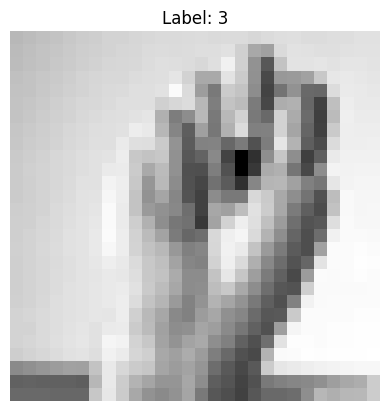

In [ ]:
#En el dataset las imagenes son 28x28=784 pixeles
#(cada uno es una columna) + el label -> 785 columnas

#ESO ES SOLO PARA MOSTRAR UNA FOTO
# prendi la 4° immagine
img = train_df.drop('label', axis=1).iloc[4].values.reshape(28, 28)

plt.imshow(img, cmap='gray')
plt.title(f"Label: {train_df.iloc[0]['label']}")
plt.axis('off')
plt.show()


In [ ]:
# Separar labels y características
y_train = train_df['label'].values
X_train = train_df.drop('label', axis=1).values

y_test = test_df['label'].values
X_test = test_df.drop('label', axis=1).values

print("Shape X_train:", X_train.shape)
print("Shape X_test: ", X_test.shape)

# Normalización de los píxeles (0-255 -> 0-1)
X_train = X_train / 255.0
X_test  = X_test / 255.0

Shape X_train: (27455, 784)
Shape X_test:  (7172, 784)


In [ ]:
input_dim = X_train.shape[1]   # 784
num_classes = len(np.unique(y_train))  + 1 # 24+1

input_dim, num_classes

#MLP
model_mlp = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model_mlp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_mlp.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237,081 (926.10 KB)

 Trainable params: 237,081 (926.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training
history_mlp = model_mlp.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(X_test, y_test)
)


Epoch 1/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2412 - loss: 2.6190 - val_accuracy: 0.5183 - val_loss: 1.5583
Epoch 2/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6043 - loss: 1.3002 - val_accuracy: 0.6044 - val_loss: 1.2889
Epoch 3/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7224 - loss: 0.9128 - val_accuracy: 0.5994 - val_loss: 1.2988
Epoch 4/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7837 - loss: 0.7085 - val_accuracy: 0.6294 - val_loss: 1.1607
Epoch 5/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8429 - loss: 0.5306 - val_accuracy: 0.6840 - val_loss: 1.0825
Epoch 6/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8796 - loss: 0.4035 - val_accuracy: 0.7018 - val_loss: 1.0420
Epoch 7/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9233 - loss: 0.2889 - val_accuracy: 0.7156 - val_loss: 0.9923
Epoch 8/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9453 - loss: 0.2145 - val_accuracy:

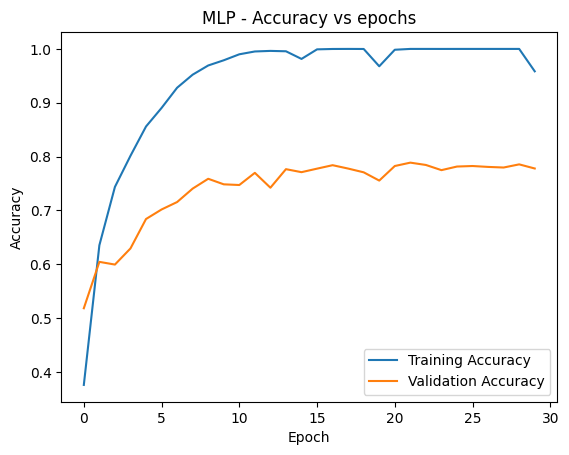

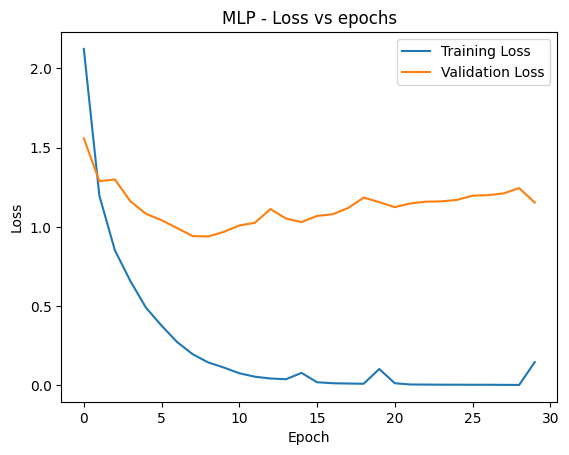

In [ ]:
# Accuracy vs epochs
plt.figure()
plt.title("MLP - Accuracy vs epochs")
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Loss vs epochs
plt.figure()
plt.title("MLP - Loss vs epochs")
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


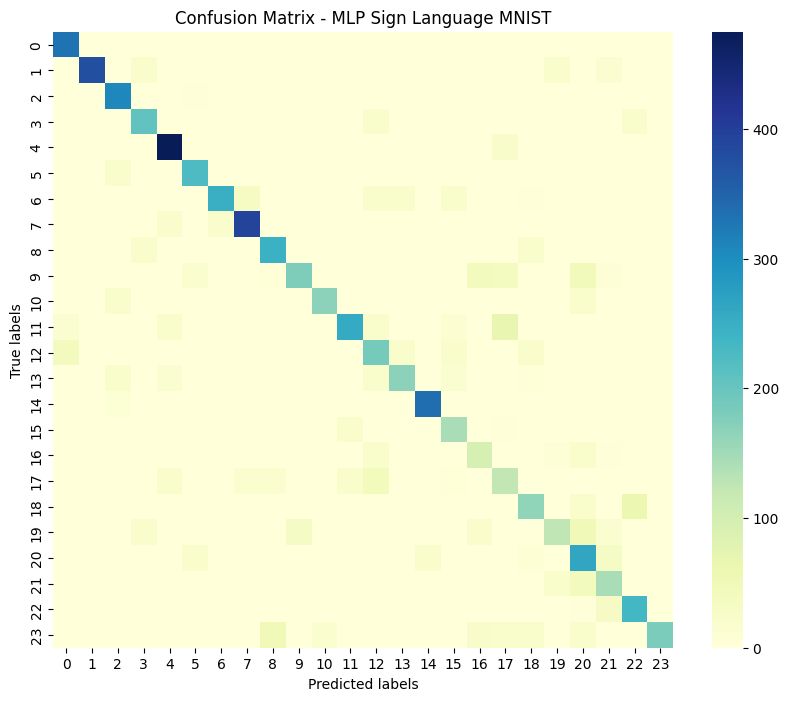

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       331
           1       1.00      0.87      0.93       432
           2       0.81      0.99      0.89       310
           3       0.77      0.84      0.80       245
           4       0.86      0.95      0.90       498
           5       0.85      0.91      0.88       247
           6       0.92      0.72      0.81       348
           7       0.88      0.90      0.89       436
           8       0.77      0.85      0.81       288
          10       0.84      0.54      0.66       331
          11       0.91      0.80      0.85       209
          12       0.87      0.65      0.75       394
          13       0.56      0.64      0.60       291
          14       0.80      0.68      0.74       246
          15       0.94      0.97      0.96       347
          16       0.66      0.87      0.75       164
          17       0.52      0.66      0.58       144
          18       0.45    

In [ ]:
# Predicciones (probabilidades)
y_pred_prob = model_mlp.predict(X_test)

# Clase predicha = índice del máximo en cada vector de probabilidades
y_pred = np.argmax(y_pred_prob, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap="YlGnBu")  # annot=False porque hay 24 clases, se llena mucho
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - MLP Sign Language MNIST")
plt.show()

# Report más detallado: precision, recall, f1-score
print(classification_report(y_test, y_pred))


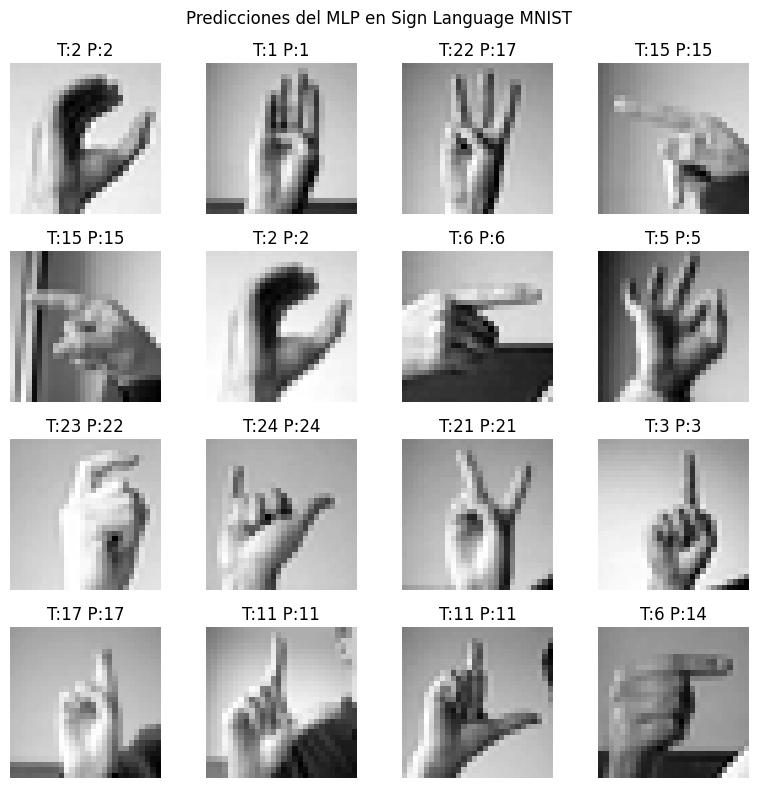

In [ ]:
# Elegimos 16 ejemplos al azar del test
idx = np.random.choice(len(X_test), size=16, replace=False)

plt.figure(figsize=(8,8))
for i, index in enumerate(idx):
    img = X_test[index].reshape(28, 28)  # reshaping solo para mostrar
    true_label = y_test[index]
    pred_label = y_pred[index]

    plt.subplot(4,4,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"T:{true_label} P:{pred_label}")
plt.suptitle("Predicciones del MLP en Sign Language MNIST")
plt.tight_layout()
plt.show()


In [ ]:
#PARTE 2B - CNN CON IMAGINES (mismo dataset)

In [ ]:
y_train = train_df["label"].values
y_test  = test_df["label"].values

X_train_flat = train_df.drop(columns=["label"]).values   # (27455, 784)
X_test_flat  = test_df.drop(columns=["label"]).values    # (7172, 784)

print("X_train_flat:", X_train_flat.shape)
print("X_test_flat :", X_test_flat.shape)

# 1. Normalizaciòn in [0,1]
X_train = X_train_flat.astype("float32") / 255.0
X_test  = X_test_flat.astype("float32") / 255.0

# 2. Reshape a (num_samples, 28, 28, 1) per la CNN (un solo canale → immagini in scala di grigi)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn  = X_test.reshape(-1, 28, 28, 1)

print("X_train_cnn:", X_train_cnn.shape)
print("X_test_cnn :", X_test_cnn.shape)


X_train_flat: (27455, 784)
X_test_flat : (7172, 784)
X_train_cnn: (27455, 28, 28, 1)
X_test_cnn : (7172, 28, 28, 1)


In [ ]:
from tensorflow.keras import layers

num_classes = len(np.unique(y_train)) + 1
print("Numero de clases:", num_classes)

model_cnn = keras.Sequential(
    [
        # Input: immagine 28x28x1
        layers.Input(shape=(28, 28, 1), name="input_layer"),

        # Primero bloque conv + pooling
        layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            name="conv1",
        ),
        layers.MaxPooling2D(pool_size=(2, 2), name="maxpool1"),

        # Segundo conv + pooling
        layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            name="conv2",
        ),
        layers.MaxPooling2D(pool_size=(2, 2), name="maxpool2"),

        # (Opzionale ma utile) un po' di regularizzazione:
        layers.BatchNormalization(name="batchnorm"),
        layers.Dropout(0.25, name="dropout"),

        # Passaggio a MLP
        layers.Flatten(name="flatten"),
        layers.Dense(128, activation="relu", name="dense1"),

        # Output: una neurone cada clase, con softmax
        layers.Dense(num_classes, activation="softmax", name="output"),
    ]
)

model_cnn.summary()


Numero de clases: 25


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm (BatchNormalization)  │ (None, 7, 7, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,833 (1.62 MB)

 Trainable params: 423,705 (1.62 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
model_cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history_cnn = model_cnn.fit(
    X_train_cnn,
    y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    shuffle=True,
)


Epoch 1/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 30s 150ms/step - accuracy: 0.9977 - loss: 0.0067 - val_accuracy: 0.9991 - val_loss: 0.0024
Epoch 2/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - accuracy: 0.9988 - loss: 0.0032 - val_accuracy: 0.9984 - val_loss: 0.0048
Epoch 3/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 41s 144ms/step - accuracy: 0.9984 - loss: 0.0042 - val_accuracy: 0.9976 - val_loss: 0.0060
Epoch 4/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 26s 152ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 7.0443e-05
Epoch 5/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.9998 - loss: 9.8952e-04 - val_accuracy: 0.8944 - val_loss: 0.4880
Epoch 6/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9956 - val_loss: 0.0115
Epoch 7/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 42s 152ms/step - accuracy: 0.9994 - loss: 0.0013 - val_accuracy: 0.9989 - val_loss: 0.0029
Epoch 8/15
172/172 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.9999 -

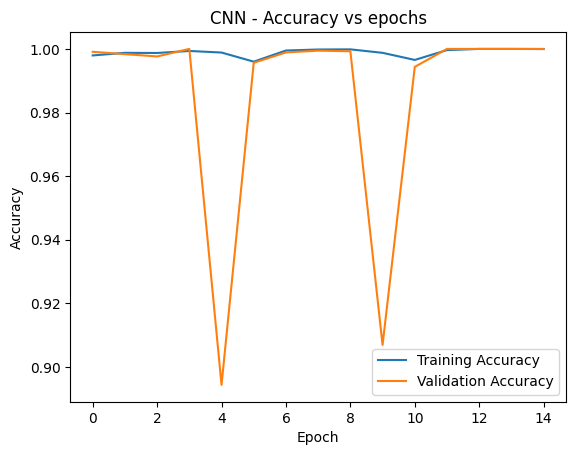

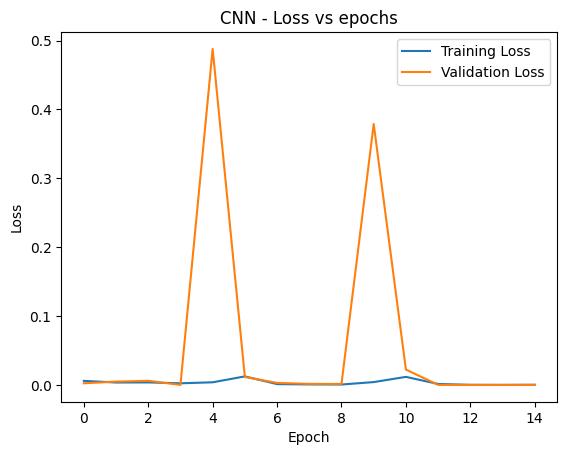

In [ ]:

# Accuracy vs epochs - CNN
plt.figure()
plt.title("CNN - Accuracy vs epochs")
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Loss vs epochs - CNN
plt.figure()
plt.title("CNN - Loss vs epochs")
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [ ]:
# Predicciones (probabilidades) de la CNN
y_pred_prob_cnn = model_cnn.predict(X_test_cnn)

# Clase predicha = índice del máximo en cada vector de probabilidades
y_pred_cnn = np.argmax(y_pred_prob_cnn, axis=1)


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step


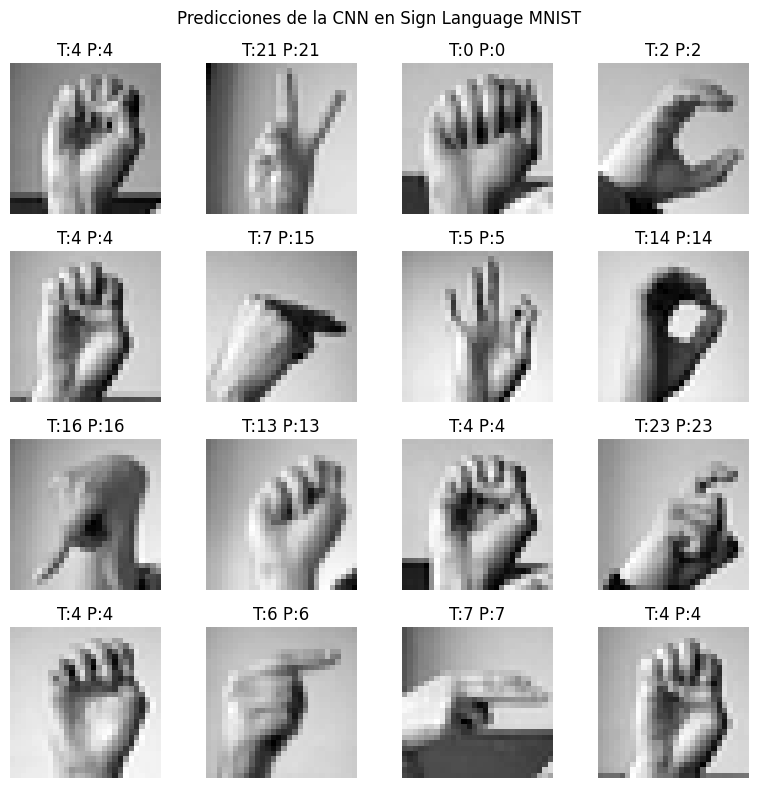

In [ ]:
# Elegimos 16 ejemplos al azar del test (para la CNN)
idx = np.random.choice(len(X_test_cnn), size=16, replace=False)

plt.figure(figsize=(8,8))
for i, index in enumerate(idx):
    # X_test_cnn tiene forma (N, 28, 28, 1)
    img = X_test_cnn[index].reshape(28, 28)  # reshaping solo para mostrar
    true_label = y_test[index]
    pred_label = y_pred_cnn[index]

    plt.subplot(4,4,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"T:{true_label} P:{pred_label}")

plt.suptitle("Predicciones de la CNN en Sign Language MNIST")
plt.tight_layout()
plt.show()


In [ ]:
# PARTE 3 – Autoencoder convoluzionale (mismo dataset de Sign Language MNIST)

In [ ]:

input_img = keras.Input(shape=(28, 28, 1), name="input_img")

# ----- ENCODER -----
# 28x28x1 -> 14x14x16
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2, name="enc_conv1")(input_img)
x = layers.Dropout(0.1, name="enc_dropout")(x)

# 14x14x16 -> 7x7x8
encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2, name="enc_conv2")(x)

# encoded è il nostro "spazio latente"

# ----- DECODER -----
# 7x7x8 -> 14x14x16
x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2, name="dec_deconv1")(encoded)
# 14x14x16 -> 28x28x1
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same', strides=2, name="dec_deconv2")(x)

# Modello autoencoder completo
autoencoder = keras.Model(input_img, decoded, name="conv_autoencoder")

autoencoder.summary()


Model: "conv_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)          │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv1 (Conv2D)              │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_dropout (Dropout)           │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv2 (Conv2D)              │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_deconv1 (Conv2DTranspose)   │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_deconv2 (Conv2DTranspose)   │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,633 (10.29 KB)

 Trainable params: 2,633 (10.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(
    optimizer="adam",
    loss="mean_squared_error",     # MSE di ricostruzione
    metrics=["mean_squared_error"] # per comodità
)

history_ae = autoencoder.fit(
    X_train_cnn, X_train_cnn,     # input = output
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(X_test_cnn, X_test_cnn)
)


Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_los

MSE di ricostruzione sul test set (Autoencoder): 0.000919


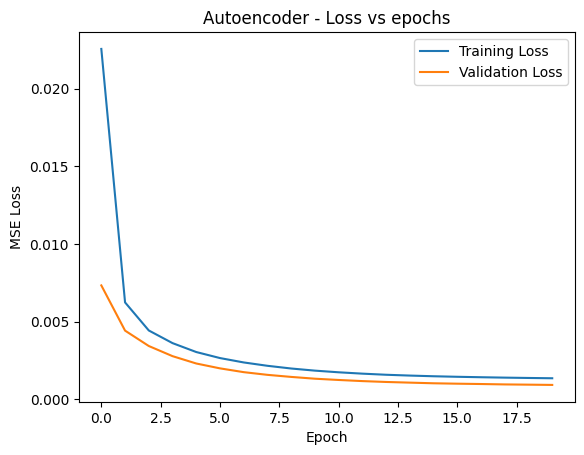

In [ ]:
test_loss_ae, test_mse_ae = autoencoder.evaluate(X_test_cnn, X_test_cnn, verbose=0)
print(f"MSE di ricostruzione sul test set (Autoencoder): {test_mse_ae:.6f}")

plt.figure()
plt.title("Autoencoder - Loss vs epochs")
plt.plot(history_ae.history['loss'])
plt.plot(history_ae.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


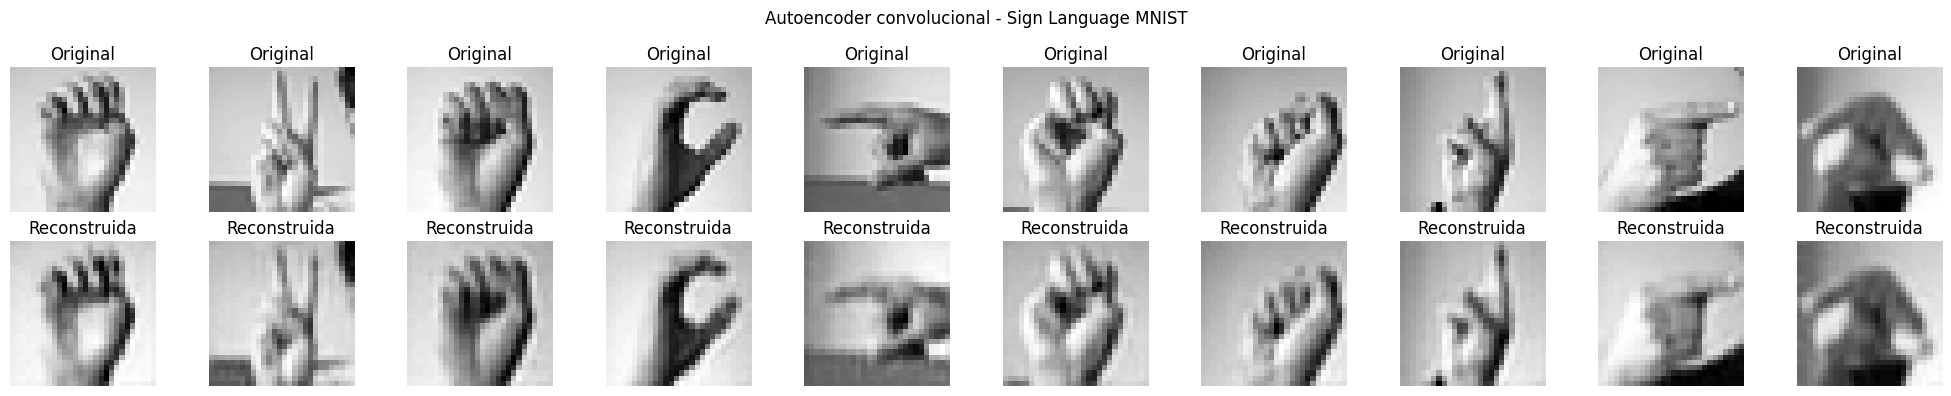

In [ ]:

# Scegliamo 10 immagini a caso dal test
n = 10
idx = np.random.choice(len(X_test_cnn), size=n, replace=False)

sample_imgs = X_test_cnn[idx]
reconstructions = autoencoder.predict(sample_imgs)

plt.figure(figsize=(20, 4))
for i in range(n):
    # Originale
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Ricostruita
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructions[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstruida")
    plt.axis("off")

plt.suptitle("Autoencoder convolucional - Sign Language MNIST")
plt.tight_layout()
plt.show()
